In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
sns.set_theme()
sns.set_palette(sns.color_palette("pastel"))
%matplotlib inline

### Import data

In [2]:
df_c1 = pd.read_csv('C1. copiah_county_synthetic_data.csv')
df_c2 = pd.read_csv('C2. claiborne_county_synthetic_data.csv')
df_c3 = pd.read_csv('C3. warren_county_synthetic_data.csv')

In [3]:
df_c1.columns == df_c2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [4]:
df_c1.columns == df_c3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [5]:
df_c1.head()

,County,Race,Age,Gender,Education Level,Employment Status,Income Level,Prior Convictions,Risk Score,Judge Decision,Re-offense
0,Copiah County,White,48,Female,Bachelor's Degree,Employed,"$20,000 - $50,000",1,9,Denied,Yes
1,Copiah County,Black,70,Male,High School,Unemployed,"$20,000 - $50,000",1,8,Denied,Yes
2,Copiah County,White,73,Male,High School,Employed,"< $20,000",1,7,Denied,No
3,Copiah County,White,26,Male,Some College,Unemployed,"$20,000 - $50,000",0,6,Granted,No
4,Copiah County,White,38,Female,Master's Degree,Employed,"$50,000 - $100,000",0,3,Granted,No


In [6]:
df_c2.head()

,County,Race,Age,Gender,Education Level,Employment Status,Income Level,Prior Convictions,Risk Score,Judge Decision,Re-offense
0,Claiborne County,Black,62,Male,Bachelor's Degree,Employed,"$20,000 - $50,000",5,2,Granted,No
1,Claiborne County,Black,48,Male,Bachelor's Degree,Employed,"$50,000 - $100,000",3,7,Denied,No
2,Claiborne County,Black,44,Male,High School,Unemployed,"$50,000 - $100,000",2,6,Denied,No
3,Claiborne County,Black,63,Female,Bachelor's Degree,Employed,"> $100,000",1,5,Denied,No
4,Claiborne County,Black,53,Female,Bachelor's Degree,Employed,"$50,000 - $100,000",2,4,Granted,No


In [7]:
df_c1.describe()

,Age,Prior Convictions,Risk Score
count,1000.000000,1000.000000,1000.000000
mean,46.399000,1.730000,5.214000
std,16.618543,1.378042,2.081475
min,18.000000,0.000000,1.000000
25%,32.000000,1.000000,4.000000
50%,47.000000,2.000000,5.000000
75%,60.250000,2.000000,7.000000
max,75.000000,9.000000,10.000000


In [8]:
df_c2.describe()

,Age,Prior Convictions,Risk Score
count,1000.000000,1000.000000,1000.000000
mean,46.948000,1.690000,5.756000
std,16.525144,1.327276,2.031401
min,18.000000,0.000000,1.000000
25%,33.000000,1.000000,4.000000
50%,47.000000,2.000000,6.000000
75%,61.000000,2.000000,7.000000
max,75.000000,6.000000,10.000000


In [9]:
df_c3.describe()

,Age,Prior Convictions,Risk Score
count,1000.000000,1000.000000,1000.000000
mean,46.747000,1.760000,5.304000
std,16.410432,1.392242,2.002397
min,18.000000,0.000000,1.000000
25%,32.000000,1.000000,4.000000
50%,47.000000,2.000000,5.000000
75%,60.000000,3.000000,7.000000
max,75.000000,8.000000,10.000000


### Preprocessing

In [10]:
df = pd.concat([df_c1, df_c2, df_c3])

In [11]:
df.shape

(3000, 11)

In [12]:
df['Age'].describe()

count    3000.000000
mean       46.698000
std        16.514308
min        18.000000
25%        33.000000
50%        47.000000
75%        61.000000
max        75.000000
Name: Age, dtype: float64

In [13]:
# Apply to dataframe
def age_bins(x):
    if x <= 25:
        return "18-25"
    elif x <= 35:
        return "26-35"
    elif x <= 45:
        return "36-45"
    elif x <= 55:
        return "46-55"
    elif x <= 65:
        return "56-65"
    else:
        return "66+"

    
df['Age_Group'] = df['Age'].apply(age_bins)

In [14]:
df[['Race', 'Risk Score']].groupby('Race').count()

,Risk Score
Race,
Black,1727
Other,76
White,1197


In [15]:
df[['Gender', 'Risk Score']].groupby('Gender').count()

,Risk Score
Gender,
Female,1499
Male,1501


In [16]:
df[['Education Level', 'Risk Score']].groupby('Education Level').count()

,Risk Score
Education Level,
Bachelor's Degree,431
High School,911
Less than High School,623
Master's Degree,220
PhD,56
Some College,759


---
### 1. Analyze the demographic profiles of three counties:

1. Evaluate and visualize the demographic characteristics (race, gender, and education) in each county using pivot tables (Excel) or Pandas (Python).
2. Deliverable: A summary of demographic data visualized through pie or bar charts and a comparison of racial and gender distributions across counties.

[]

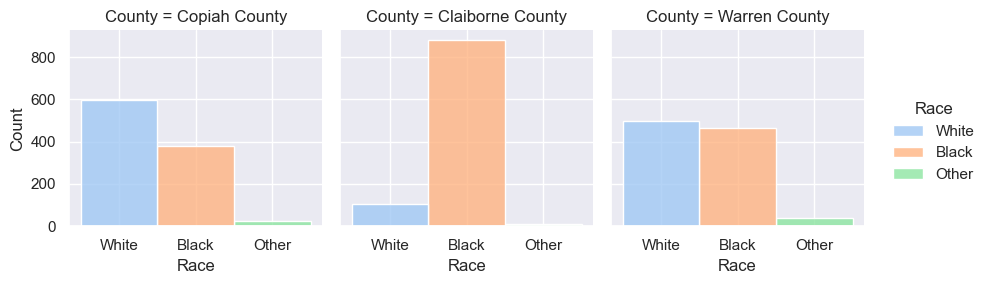

In [17]:
sns.displot(df, x='Race', col='County', height=3, hue='Race', alpha=0.8)
plt.plot()

[]

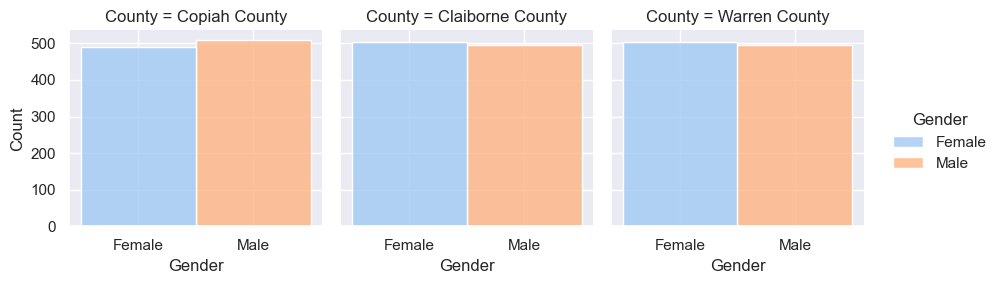

In [18]:
sns.displot(df, x='Gender', col='County', height=3, hue='Gender', alpha=0.8)
plt.plot()

[]

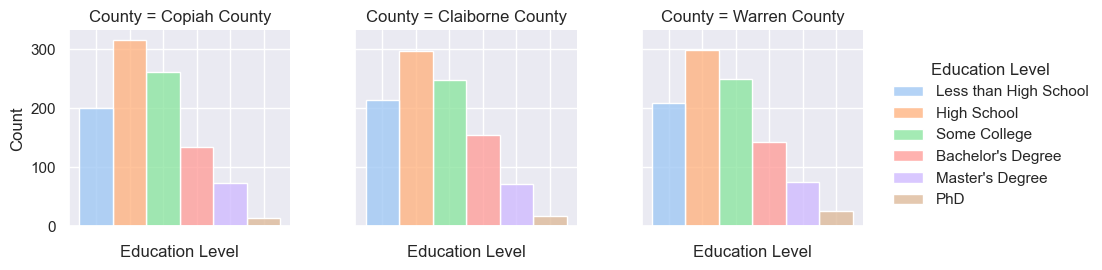

In [19]:
col_order = ['Less than High School', 'High School', 'Some College', "Bachelor's Degree", "Master's Degree", 'PhD']
df['Education Level'] = pd.Categorical(df['Education Level'], col_order)

sns.displot(df, x='Education Level', col='County', height=3, hue='Education Level', alpha=0.8, hue_order=col_order, row_order=col_order).set_xticklabels("")
plt.plot()

---
### 2. Evaluate risk scores across demographic groups:

1. Analyze the distribution of risk scores by race and gender within each county.
2. Deliverable: A summary table showing average risk scores for each demographic group, with accompanying visualizations (e.g., bar charts).
3. Provide an analysis of how risk scores vary across counties and demographic groups.

In [20]:
df[['Race', 'Risk Score']].groupby('Race').describe()

Risk Score                                               
           count      mean       std  min  25%  50%   75%   max
Race                                                           
Black     1727.0  5.876665  1.988485  1.0  5.0  6.0  7.00  10.0
Other       76.0  4.657895  2.049733  1.0  3.0  4.0  6.25   9.0
White     1197.0  4.821220  1.972160  1.0  3.0  5.0  6.00  10.0

In [21]:
df[['Gender', 'Risk Score']].groupby('Gender').describe()

Risk Score                                              
            count      mean       std  min  25%  50%  75%   max
Gender                                                         
Female     1499.0  5.416278  2.087576  1.0  4.0  5.0  7.0  10.0
Male       1501.0  5.433045  2.016023  1.0  4.0  5.0  7.0  10.0

<Axes: xlabel='Risk Score', ylabel='Race'>

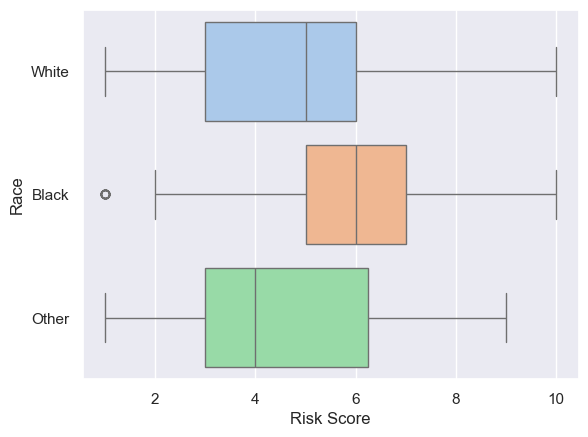

In [22]:
sns.boxplot(df, y='Race', x='Risk Score', hue='Race')

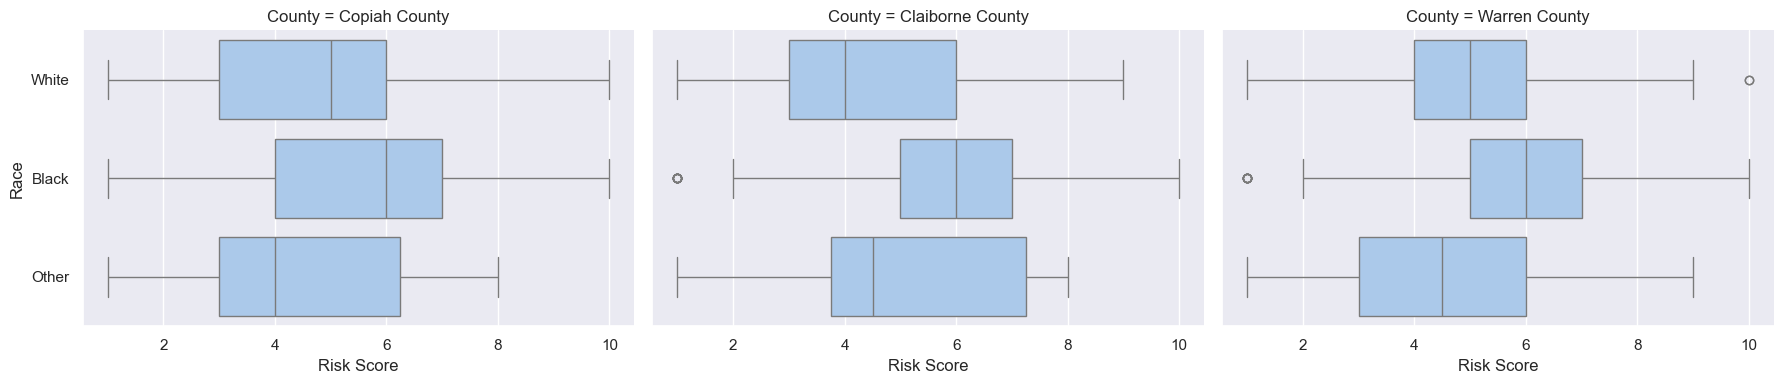

In [23]:
# Create FacetGrid
g = sns.FacetGrid(df, col='County', height=4, aspect=1.5)

# Map boxplot to the grid
g.map_dataframe(
    sns.boxplot,
    x='Risk Score',
    y='Race'
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='Risk Score', ylabel='Gender'>

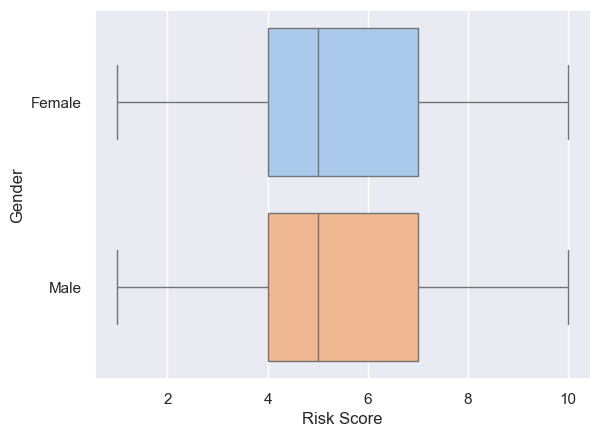

In [24]:
sns.boxplot(df, y='Gender', x='Risk Score', hue='Gender')

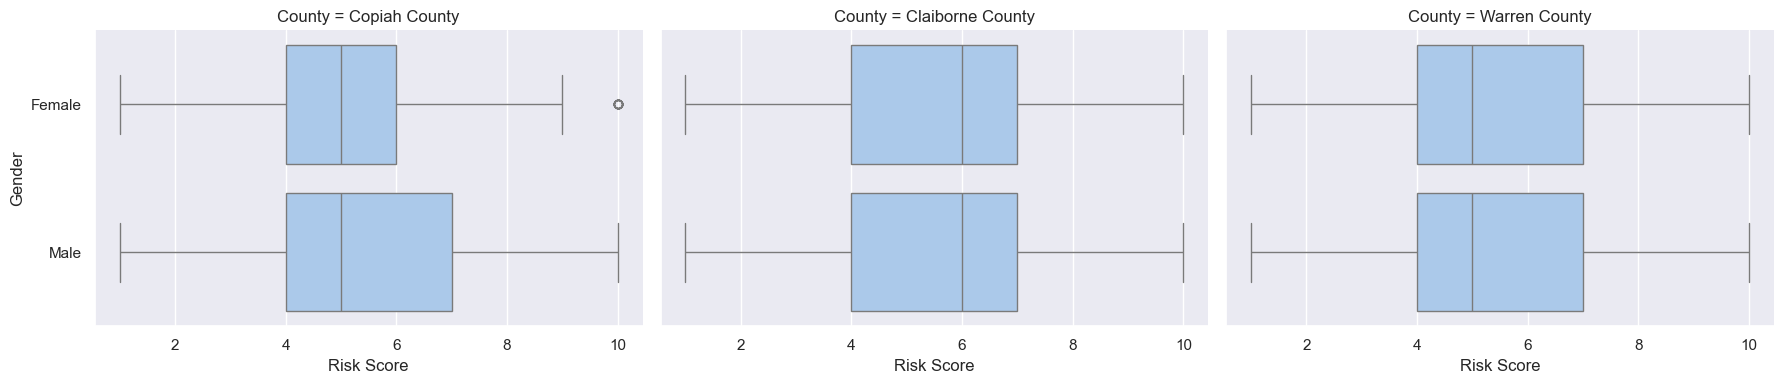

In [25]:
# Create FacetGrid
g = sns.FacetGrid(df, col='County', height=4, aspect=1.5)

# Map boxplot to the grid
g.map_dataframe(
    sns.boxplot,
    x='Risk Score',
    y='Gender'
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

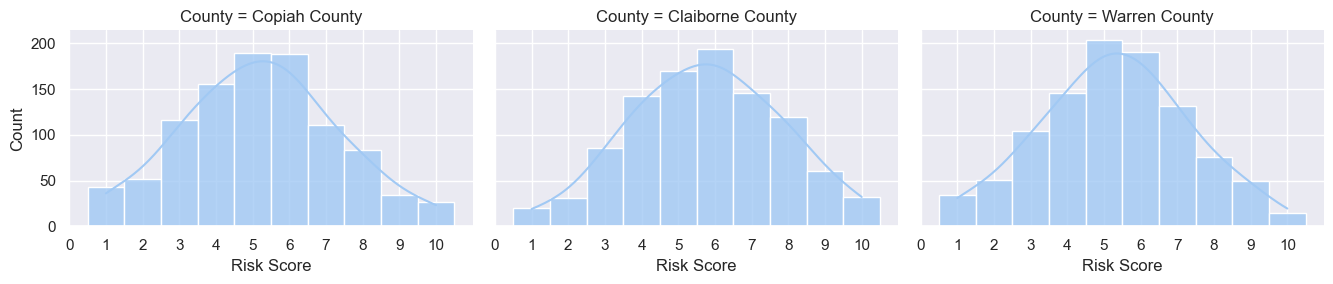

In [26]:
# Create FacetGrid
g = sns.FacetGrid(df, col='County', height=3, aspect=1.5)

# Map boxplot to the grid
g.map_dataframe(
    sns.histplot,
    x='Risk Score',
    bins=np.arange(0.5, 11.5, 1),
    alpha=0.8,
    kde=True,
    kde_kws={
        'bw_adjust': 1.5,
        'cut': 0,
    }
)

# Adjust the layout
plt.tight_layout()
plt.xticks(range(11))

# Show the plot
plt.show()

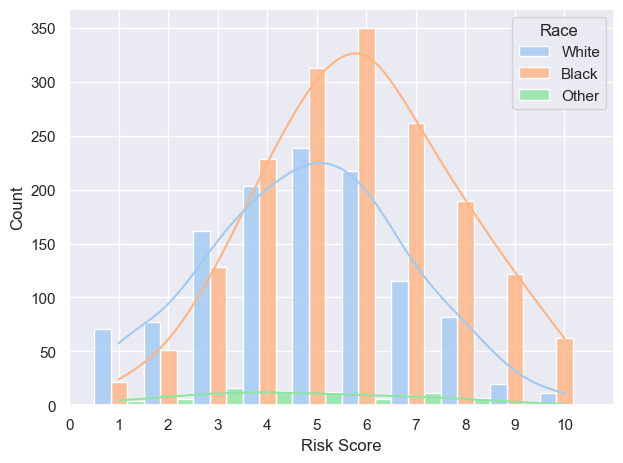

In [27]:
race_risk_hist = sns.histplot(
    data=df,
    x='Risk Score',
    hue='Race',
    multiple="dodge",
    # stat='count',
    element='bars',
    alpha=0.8,
    edgecolor='white',
    linewidth=1,
    bins=np.arange(0.5, 11.5, 1),
    kde=True,
    kde_kws={
        'bw_adjust': 1.5,
        'cut': 0,
    }
)

race_risk_hist.set_xticks([i for i in range(0,11)])
plt.tight_layout()
plt.show()

---
### 3. Compare judge decisions to AI risk scores:

1. Investigate the alignment between judges’ bail decisions and AI-generated risk scores across racial and gender groups.
2. Deliverable: Cross-tabulate risk scores and judge decisions using stacked bar charts to evaluate consistency. Discuss patterns of bias in decision-making, highlighting any discrepancies between groups.

In [28]:
# overview 
pd.crosstab([df['Race'], df['Judge Decision']], df['Risk Score'])

Risk Score            1   2    3    4    5    6    7    8    9   10
Race  Judge Decision                                               
Black Denied           0   0    0    0  313  350  262  189  122  62
      Granted         22  51  128  228    0    0    0    0    0   0
Other Denied           0   0    0    0    0    0   11    7    1   0
      Granted          4   6   16   13   12    6    0    0    0   0
White Denied           0   0    0    0    0    0  115   82   20  11
      Granted         71  77  162  203  239  217    0    0    0   0

In [29]:
# overview 
pd.crosstab([df['Gender'], df['Judge Decision']], df['Risk Score'])

Risk Score             1   2    3    4    5    6    7    8   9   10
Gender Judge Decision                                              
Female Denied           0   0    0    0  161  175  182  132  74  44
       Granted         54  68  149  225  119  116    0    0   0   0
Male   Denied           0   0    0    0  152  175  206  146  69  29
       Granted         43  66  157  219  132  107    0    0   0   0

In [30]:
race_pivot = pd.crosstab([df['County'], df['Race'], df['Judge Decision']], df['Risk Score'], margins=False)
race_pivot

Risk Score                             1   2   3    4    5    6    7    8   \
County           Race  Judge Decision                                        
Claiborne County Black Denied           0   0   0    0  152  181  133  110   
                       Granted         10  23  65  119    0    0    0    0   
                 Other Denied           0   0   0    0    0    0    1    3   
                       Granted          1   0   2    3    1    1    0    0   
                 White Denied           0   0   0    0    0    0   12    6   
                       Granted          9   8  19   20   17   12    0    0   
Copiah County    Black Denied           0   0   0    0   67   77   54   42   
                       Granted          4  14  29   52    0    0    0    0   
                 Other Denied           0   0   0    0    0    0    5    1   
                       Granted          1   2   7    3    3    2    0    0   
                 White Denied           0   0   0    0    0    0   52   40   
                       Granted         38  36  80  101  120  109    0    0   
Warren County    Black Denied           0   0   0    0   94   92   75   37   
                       Granted          8  14  34   57    0    0    0    0   
                 Other Denied           0   0   0    0    0    0    5    3   
                       Granted          2   4   7    7    8    3    0    0   
                 White Denied           0   0   0    0    0    0   51   36   
                       Granted         24  33  63   82  102   96    0    0   

Risk Score                             9   10  
County           Race  Judge Decision          
Claiborne County Black Denied          57  32  
                       Granted          0   0  
                 Other Denied           0   0  
                       Granted          0   0  
                 White Denied           3   0  
                       Granted          0   0  
Copiah County    Black Denied          24  18  
                       Granted          0   0  
                 Other Denied           0   0  
                       Granted          0   0  
                 White Denied          10   9  
                       Granted          0   0  
Warren County    Black Denied          41  12  
                       Granted          0   0  
                 Other Denied           1   0  
                       Granted          0   0  
                 White Denied           7   2  
                       Granted          0   0

In [31]:
gender_pivot = pd.crosstab([df['County'], df['Gender'], df['Judge Decision']], df['Risk Score'], margins=False)
gender_pivot

Risk Score                              1   2   3   4   5   6   7   8   9   10
County           Gender Judge Decision                                        
Claiborne County Female Denied           0   0   0   0  69  89  73  54  36  21
                        Granted         11  14  46  78   9   5   0   0   0   0
                 Male   Denied           0   0   0   0  83  92  73  65  24  11
                        Granted          9  17  40  64   9   8   0   0   0   0
Copiah County    Female Denied           0   0   0   0  36  38  51  41  16  13
                        Granted         25  28  52  73  60  57   0   0   0   0
                 Male   Denied           0   0   0   0  31  39  60  42  18  14
                        Granted         18  24  64  83  63  54   0   0   0   0
Warren County    Female Denied           0   0   0   0  56  48  58  37  22  10
                        Granted         18  26  51  74  50  54   0   0   0   0
                 Male   Denied           0   0   0   0  38  44  73  39  27   4
                        Granted         16  25  53  72  60  45   0   0   0   0

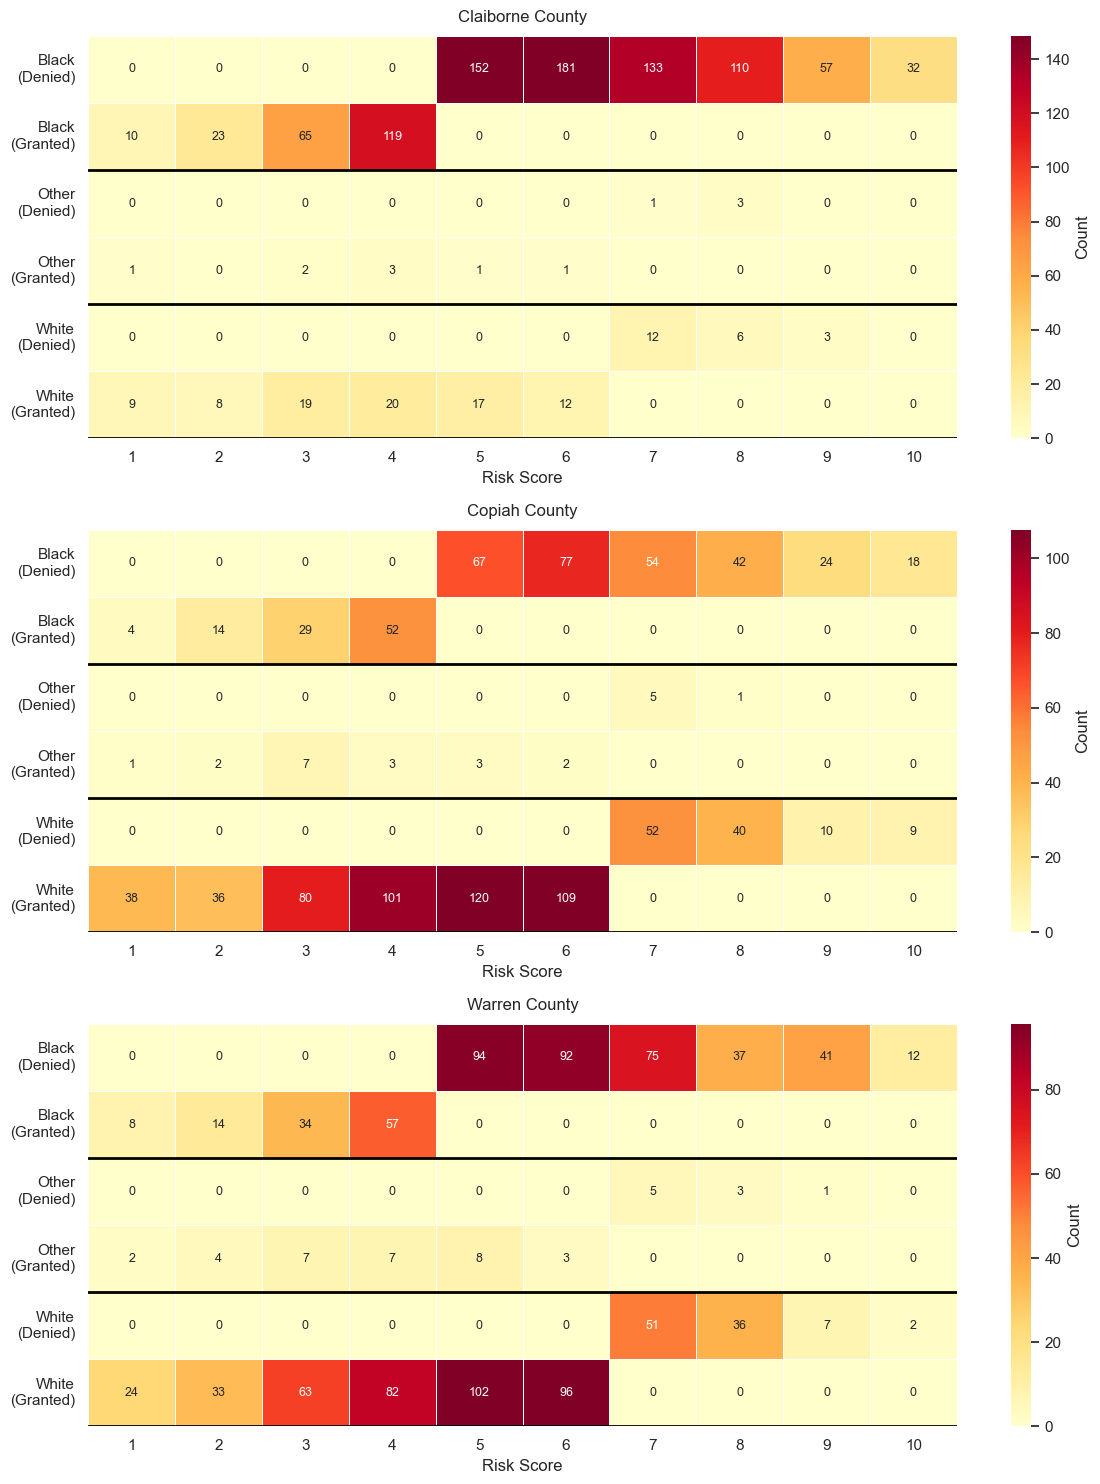

In [32]:
# Set up the figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Color scheme
cmap = 'YlOrRd'  # or 'RdYlBu_r' for a diverging colormap

# Process each county
for idx, (county, county_data) in enumerate(race_pivot.groupby(level=0)):
    # Create matrix for this county
    county_matrix = county_data.reset_index()
    county_matrix['Group'] = county_matrix['Race'] + '\n(' + county_matrix['Judge Decision'] + ')'
    heatmap_matrix = county_matrix.set_index('Group').iloc[:, 3:]
    
    # Create heatmap
    sns.heatmap(heatmap_matrix,
                cmap=cmap,
                annot=True,
                fmt='g',
                cbar_kws={'label': 'Count'},
                ax=axes[idx],
                square=False,
                robust=True,
                annot_kws={'size': 9},
                linewidths=0.5,
                linecolor='white')
    
    # Add horizontal lines between racial groups
    race_sizes = county_matrix.groupby('Race').size()
    current_pos = 0
    for size in race_sizes:
        axes[idx].axhline(y=current_pos + size, color='black', linewidth=2)
        current_pos += size
    
    # Customize subplot
    axes[idx].set_title(f'{county}', pad=10, fontsize=12)
    axes[idx].set_xlabel('Risk Score')
    axes[idx].set_ylabel('')
    
    # Rotate labels for better readability
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
race_pivot = pd.crosstab([df['County'], df['Race']], df['Judge Decision'], margins=True)
race_pivot['% Denied'] = round(race_pivot['Denied'] / race_pivot['All'] * 100, 1)
race_pivot['% Granted'] = round(race_pivot['Granted'] / race_pivot['All'] * 100, 1)
race_pivot

Judge Decision          Denied  Granted   All  % Denied  % Granted
County           Race                                             
Claiborne County Black     665      217   882      75.4       24.6
                 Other       4        8    12      33.3       66.7
                 White      21       85   106      19.8       80.2
Copiah County    Black     282       99   381      74.0       26.0
                 Other       6       18    24      25.0       75.0
                 White     111      484   595      18.7       81.3
Warren County    Black     351      113   464      75.6       24.4
                 Other       9       31    40      22.5       77.5
                 White      96      400   496      19.4       80.6
All                       1545     1455  3000      51.5       48.5

In [34]:
gender_pivot = pd.crosstab([df['County'], df['Gender']], df['Judge Decision'], margins=True)
gender_pivot['% Denied'] = round(gender_pivot['Denied'] / gender_pivot['All'] * 100, 1)
gender_pivot['% Granted'] = round(gender_pivot['Granted'] / gender_pivot['All'] * 100, 1)
gender_pivot

Judge Decision           Denied  Granted   All  % Denied  % Granted
County           Gender                                            
Claiborne County Female     342      163   505      67.7       32.3
                 Male       348      147   495      70.3       29.7
Copiah County    Female     195      295   490      39.8       60.2
                 Male       204      306   510      40.0       60.0
Warren County    Female     231      273   504      45.8       54.2
                 Male       225      271   496      45.4       54.6
All                        1545     1455  3000      51.5       48.5

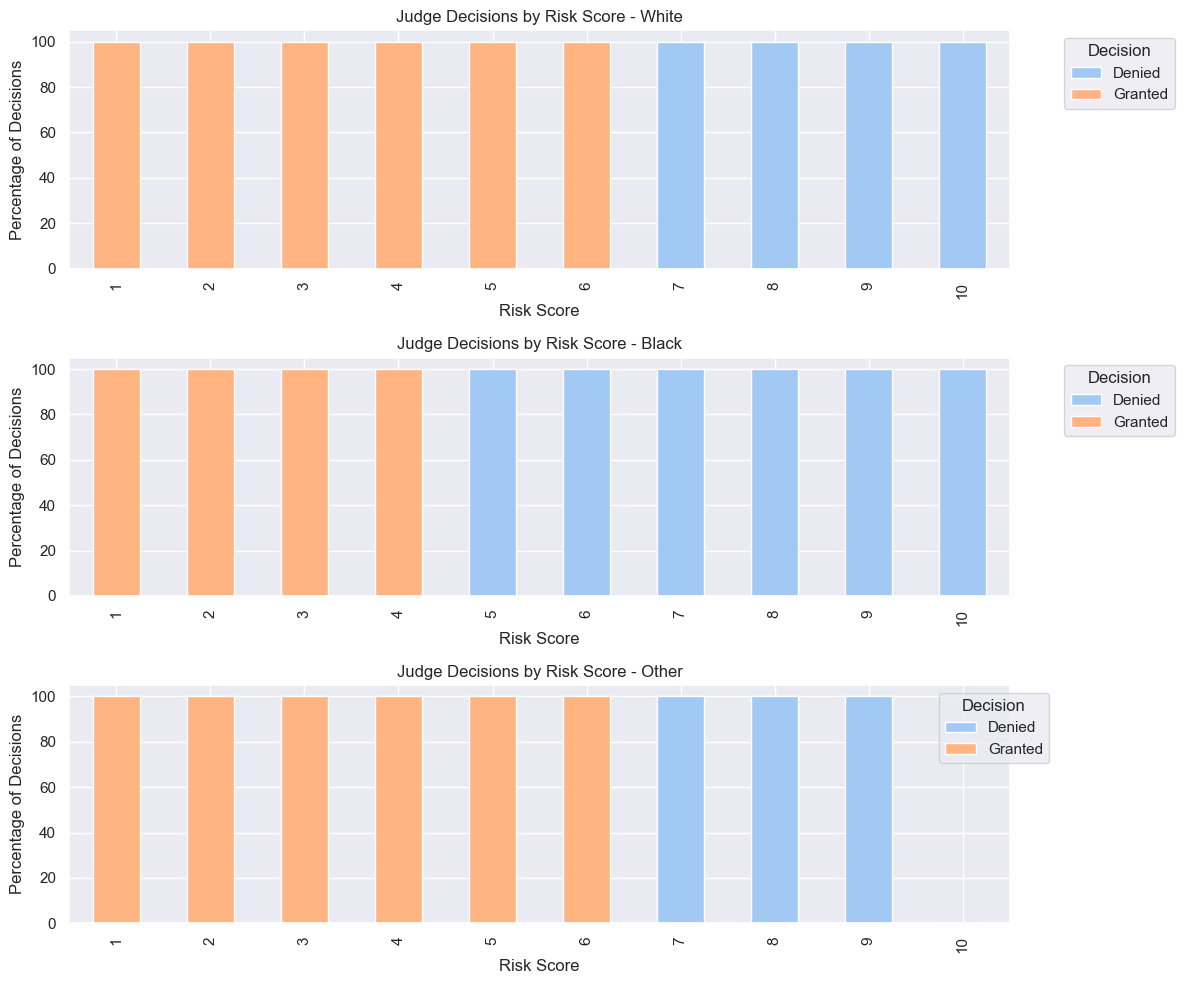

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for i, col in enumerate(df['Race'].unique()):
    race_data = df[df['Race'] == col]
    ct = pd.crosstab(race_data['Risk Score'], 
                     race_data['Judge Decision'],
                     normalize='index') * 100

        # Reindex to ensure all risk scores are present
    ct = ct.reindex(range(1, 11))  # This will add missing risk scores with NaN values
    ct = ct.fillna(0)  # Fill NaN with 0
    
    # Plot directly to the specific axis
    ct.plot(kind='bar', 
           stacked=True, 
           ax=axes[i],
           title=f'Judge Decisions by Risk Score - {col}')
    
    # Customize each subplot
    axes[i].set_xlabel('Risk Score')
    axes[i].set_ylabel('Percentage of Decisions')
    axes[i].legend(title='Decision', bbox_to_anchor=(1.05, 1))

# Add ONLY ONE tight_layout at the end
plt.tight_layout()
# Add ONLY ONE show at the end
plt.show()

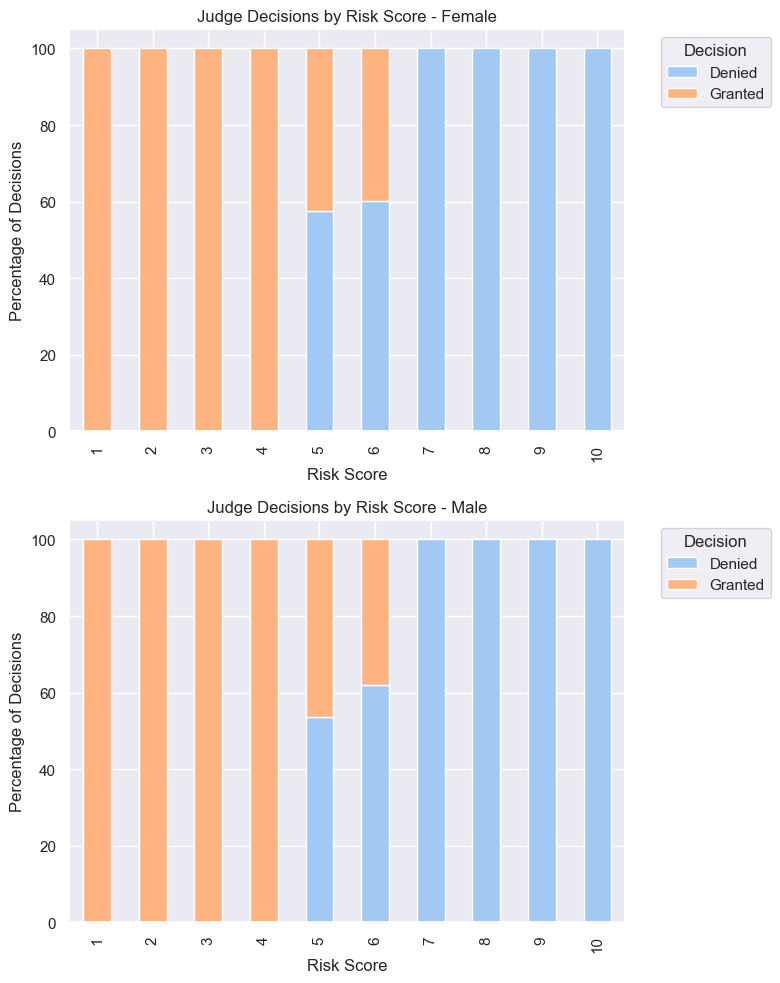

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

for i, col in enumerate(df['Gender'].unique()):
    race_data = df[df['Gender'] == col]
    ct = pd.crosstab(race_data['Risk Score'], 
                     race_data['Judge Decision'],
                     normalize='index') * 100
    
    # Plot directly to the specific axis
    ct.plot(kind='bar', 
           stacked=True, 
           ax=axes[i],
           title=f'Judge Decisions by Risk Score - {col}')
    
    # Customize each subplot
    axes[i].set_xlabel('Risk Score')
    axes[i].set_ylabel('Percentage of Decisions')
    axes[i].legend(title='Decision', bbox_to_anchor=(1.05, 1))

# Add ONLY ONE tight_layout at the end
plt.tight_layout()
# Add ONLY ONE show at the end
plt.show()

[]

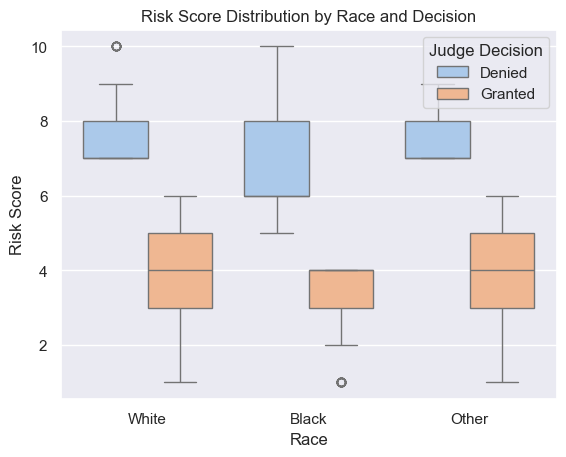

In [37]:
sns.boxplot(data=df, x='Race', y='Risk Score', hue='Judge Decision')
plt.title('Risk Score Distribution by Race and Decision')
plt.xlabel('Race')
plt.ylabel('Risk Score')
plt.plot()

[]

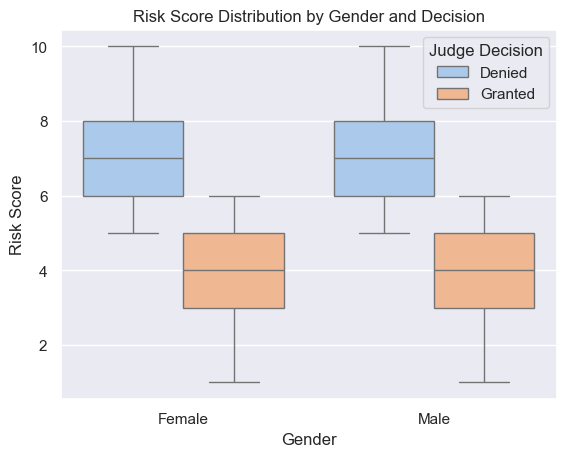

In [38]:
sns.boxplot(data=df, x='Gender', y='Risk Score', hue='Judge Decision')
plt.title('Risk Score Distribution by Gender and Decision')
plt.xlabel('Gender')
plt.ylabel('Risk Score')
plt.plot()

### 

---
### Additional analysis, 
Testing re-offense against risk score and judge bail decisions per race and gender. 

In [39]:
gender_pivot_reoffense = pd.crosstab([df['County'], df['Gender']], df['Re-offense'], margins=True)
gender_pivot_reoffense['% No'] = round(gender_pivot_reoffense['No'] / gender_pivot_reoffense['All'] * 100, 1)
gender_pivot_reoffense['% Yes'] = round(gender_pivot_reoffense['Yes'] / gender_pivot_reoffense['All'] * 100, 1)
gender_pivot_reoffense

Re-offense                 No  Yes   All  % No  % Yes
County           Gender                              
Claiborne County Female   349  156   505  69.1   30.9
                 Male     343  152   495  69.3   30.7
Copiah County    Female   364  126   490  74.3   25.7
                 Male     361  149   510  70.8   29.2
Warren County    Female   351  153   504  69.6   30.4
                 Male     366  130   496  73.8   26.2
All                      2134  866  3000  71.1   28.9

In [40]:
race_pivot_reoffense = pd.crosstab([df['County'], df['Race']], df['Re-offense'], margins=True)
race_pivot_reoffense['% No'] = round(race_pivot_reoffense['No'] / race_pivot_reoffense['All'] * 100, 1)
race_pivot_reoffense['% Yes'] = round(race_pivot_reoffense['Yes'] / race_pivot_reoffense['All'] * 100, 1)
race_pivot_reoffense

Re-offense                No  Yes   All  % No  % Yes
County           Race                               
Claiborne County Black   607  275   882  68.8   31.2
                 Other     8    4    12  66.7   33.3
                 White    77   29   106  72.6   27.4
Copiah County    Black   259  122   381  68.0   32.0
                 Other    21    3    24  87.5   12.5
                 White   445  150   595  74.8   25.2
Warren County    Black   325  139   464  70.0   30.0
                 Other    30   10    40  75.0   25.0
                 White   362  134   496  73.0   27.0
All                     2134  866  3000  71.1   28.9

In [41]:
race_pivot_score_reoffense = pd.crosstab([df['Race'], df['Risk Score']], df['Re-offense'], margins=True)
race_pivot_score_reoffense['% No'] = round(race_pivot_score_reoffense['No'] / race_pivot_score_reoffense['All'] * 100, 1)
race_pivot_score_reoffense['% Yes'] = round(race_pivot_score_reoffense['Yes'] / race_pivot_score_reoffense['All'] * 100, 1)
race_pivot_score_reoffense

Re-offense          No  Yes   All   % No  % Yes
Race  Risk Score                               
Black 1             19    3    22   86.4   13.6
      2             42    9    51   82.4   17.6
      3            103   25   128   80.5   19.5
      4            178   50   228   78.1   21.9
      5            252   61   313   80.5   19.5
      6            260   90   350   74.3   25.7
      7            191   71   262   72.9   27.1
      8             75  114   189   39.7   60.3
      9             40   82   122   32.8   67.2
      10            31   31    62   50.0   50.0
Other 1              4    0     4  100.0    0.0
      2              5    1     6   83.3   16.7
      3             14    2    16   87.5   12.5
      4             12    1    13   92.3    7.7
      5              8    4    12   66.7   33.3
      6              5    1     6   83.3   16.7
      7              9    2    11   81.8   18.2
      8              2    5     7   28.6   71.4
      9              0    1     1    0.0  100.0
White 1             63    8    71   88.7   11.3
      2             64   13    77   83.1   16.9
      3            134   28   162   82.7   17.3
      4            161   42   203   79.3   20.7
      5            184   55   239   77.0   23.0
      6            151   66   217   69.6   30.4
      7             82   33   115   71.3   28.7
      8             31   51    82   37.8   62.2
      9              7   13    20   35.0   65.0
      10             7    4    11   63.6   36.4
All               2134  866  3000   71.1   28.9

In [42]:
gender_pivot_score_reoffense = pd.crosstab([df['Gender'], df['Risk Score']], df['Re-offense'], margins=True)
gender_pivot_score_reoffense['% No'] = round(gender_pivot_score_reoffense['No'] / gender_pivot_score_reoffense['All'] * 100, 1)
gender_pivot_score_reoffense['% Yes'] = round(gender_pivot_score_reoffense['Yes'] / gender_pivot_score_reoffense['All'] * 100, 1)
gender_pivot_score_reoffense

Re-offense           No  Yes   All  % No  % Yes
Gender Risk Score                              
Female 1             47    7    54  87.0   13.0
       2             54   14    68  79.4   20.6
       3            124   25   149  83.2   16.8
       4            175   50   225  77.8   22.2
       5            227   53   280  81.1   18.9
       6            214   77   291  73.5   26.5
       7            127   55   182  69.8   30.2
       8             45   87   132  34.1   65.9
       9             23   51    74  31.1   68.9
       10            28   16    44  63.6   36.4
Male   1             39    4    43  90.7    9.3
       2             57    9    66  86.4   13.6
       3            127   30   157  80.9   19.1
       4            176   43   219  80.4   19.6
       5            217   67   284  76.4   23.6
       6            202   80   282  71.6   28.4
       7            155   51   206  75.2   24.8
       8             63   83   146  43.2   56.8
       9             24   45    69  34.8   65.2
       10            10   19    29  34.5   65.5
All                2134  866  3000  71.1   28.9

In [43]:
race_pivot_judge_reoffense = pd.crosstab([df['Race'], df['Judge Decision']], df['Re-offense'], margins=True)
race_pivot_judge_reoffense['% No'] = round(race_pivot_judge_reoffense['No'] / race_pivot_judge_reoffense['All'] * 100, 1)
race_pivot_judge_reoffense['% Yes'] = round(race_pivot_judge_reoffense['Yes'] / race_pivot_judge_reoffense['All'] * 100, 1)
race_pivot_judge_reoffense

Re-offense              No  Yes   All  % No  % Yes
Race  Judge Decision                              
Black Denied           849  449  1298  65.4   34.6
      Granted          342   87   429  79.7   20.3
Other Denied            11    8    19  57.9   42.1
      Granted           48    9    57  84.2   15.8
White Denied           127  101   228  55.7   44.3
      Granted          757  212   969  78.1   21.9
All                   2134  866  3000  71.1   28.9

In [44]:
gender_pivot_judge_reoffense = pd.crosstab([df['Gender'], df['Judge Decision']], df['Re-offense'], margins=True)
gender_pivot_judge_reoffense['% No'] = round(gender_pivot_judge_reoffense['No'] / gender_pivot_judge_reoffense['All'] * 100, 1)
gender_pivot_judge_reoffense['% Yes'] = round(gender_pivot_judge_reoffense['Yes'] / gender_pivot_judge_reoffense['All'] * 100, 1)
gender_pivot_judge_reoffense

Re-offense               No  Yes   All  % No  % Yes
Gender Judge Decision                              
Female Denied           489  279   768  63.7   36.3
       Granted          575  156   731  78.7   21.3
Male   Denied           498  279   777  64.1   35.9
       Granted          572  152   724  79.0   21.0
All                    2134  866  3000  71.1   28.9

[]

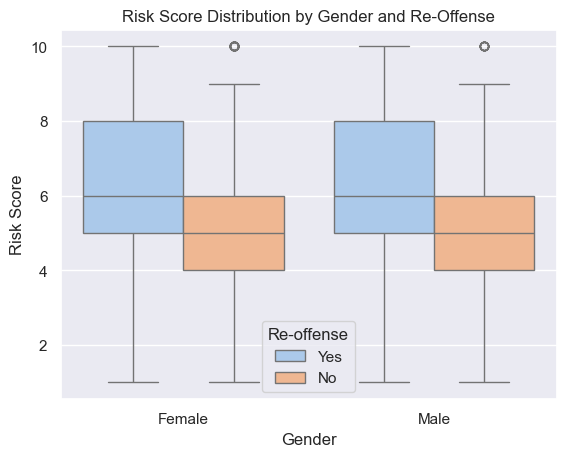

In [45]:
sns.boxplot(data=df, x='Gender', y='Risk Score', hue='Re-offense')
plt.title('Risk Score Distribution by Gender and Re-Offense')
plt.xlabel('Gender')
plt.ylabel('Risk Score')
plt.plot()

[]

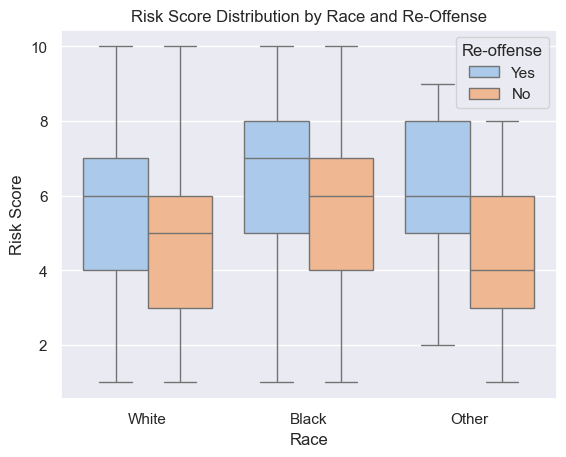

In [46]:
sns.boxplot(data=df, x='Race', y='Risk Score', hue='Re-offense')
plt.title('Risk Score Distribution by Race and Re-Offense')
plt.xlabel('Race')
plt.ylabel('Risk Score')
plt.plot()

---
### 4A. Analyze re-offense rates and fairness metrics:
1. Calculate re-offense rates and key fairness metrics, including False Positive Rates (FPR) and False Negative Rates (FNR), for each racial group.
2. Deliverable: Bar charts comparing FPR and FNR across racial groups, accompanied by an interpretation of any disparities found.

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
df[['Race', 'Judge Decision', 'Re-offense']].to_clipboard()

In [49]:
# assume denied bail / re-offense = 0
# assume granted bail / no re-offense = 1
# assume re-offense is the ground truth

y_pred = df['Judge Decision'].apply(lambda x: 1 if x=="Granted" else 0) # because denied should 'predicts' re-offense

y = df['Re-offense'].apply(lambda x: 0 if x=="Yes" else 1)


In [50]:
results_dict_4a = {}

for col in df['Race'].unique():
    results_dict_4a[col] = {}

    tn, fp, fn, tp = confusion_matrix(y[df['Race'] == col], y_pred[df['Race'] == col]).ravel()

    # Sensitivity, hit rate, recall, or true positive rate
    tpr = tp/(tp+fn)
    # Specificity or true negative rate
    tnr = tn/(tn+fp)
    # Precision or positive predictive value
    ppv = tp/(tp+fp)
    # Negative predictive value
    npv = tn/(tn+fn)
    # Fall out or false positive rate
    fpr = fp/(fp+tn)
    # False negative rate
    fnr = fn/(tp+fn)
    # False discovery rate
    fdr = fp/(tp+fp)
    # Overall accuracy
    acc = (tp+tn)/(tp+fp+fn+tn)

    results_dict_4a[col]['FPR'] = round(fpr, 3)
    results_dict_4a[col]['FNR'] = round(fnr, 3)
    results_dict_4a[col]['PPV'] = round(ppv, 3) # precision
    results_dict_4a[col]['TPR'] = round(tpr, 3) # recall 
    results_dict_4a[col]['Acc'] = round(acc, 3) # accuracy
    results_dict_4a[col]['Negative Rate'] = round((tn+fn) / (tp+fp+fn+tn), 3)
    results_dict_4a[col]['Positive Rate'] = round((tp+fp) / (tp+fp+fn+tn), 3)
    results_dict_4a[col]['Group Population'] = (tp+fp+fn+tn)
    results_dict_4a[col]['Group TN'] = tn
    results_dict_4a[col]['Group TP'] = tp
    results_dict_4a[col]['Group FN'] = fn
    results_dict_4a[col]['Group FP'] = fp


# for col in df['Gender'].unique():
#     results_dict[col] = {}

#     tn, fp, fn, tp = confusion_matrix(y_pred[df['Gender'] == col], y[df['Gender'] == col]).ravel()

#     # Sensitivity, hit rate, recall, or true positive rate
#     tpr = tp/(tp+fn)
#     # Specificity or true negative rate
#     tnr = tn/(tn+fp)
#     # Precision or positive predictive value
#     ppv = tp/(tp+fp)
#     # Negative predictive value
#     npv = tn/(tn+fn)
#     # Fall out or false positive rate
#     fpr = fp/(fp+tn)
#     # False negative rate
#     fnr = fn/(tp+fn)
#     # False discovery rate
#     fdr = fp/(tp+fp)
#     # Overall accuracy
#     acc = (tp+tn)/(tp+fp+fn+tn)

#     results_dict[col]['FPR'] = round(fpr, 3)
#     results_dict[col]['FNR'] = round(fnr, 3)
#     results_dict[col]['PPV'] = round(ppv, 3)
#     results_dict[col]['TP'] = tp

In [51]:
metrics_df_4a = pd.DataFrame(results_dict_4a)
metrics_df_4a

,White,Black,Other
FPR,0.677,0.162,0.529
FNR,0.144,0.713,0.186
PPV,0.781,0.797,0.842
TPR,0.856,0.287,0.814
Acc,0.717,0.458,0.737
Negative Rate,0.190,0.752,0.250
Positive Rate,0.810,0.248,0.750
Group Population,1197.000,1727.000,76.000
Group TN,101.000,449.000,8.000
Group TP,757.000,342.000,48.000


In [52]:
# calculate disparities
# white

disparity_white = pd.DataFrame({
    'White': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  # White/White = 1.0
    'Black': round(metrics_df_4a['Black'] / metrics_df_4a['White'], 3),
    'Other': round(metrics_df_4a['Other'] / metrics_df_4a['White'], 3)
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_white

,White,Black,Other
FPR,1.0,0.239,0.781
FNR,1.0,4.951,1.292
PPV,1.0,1.020,1.078
TPR,1.0,0.335,0.951
Positive Rate,1.0,0.306,0.926
Negative Rate,1.0,3.958,1.316


In [53]:
# calculate disparities
# black

disparity_black = pd.DataFrame({
    'White': round(metrics_df_4a['White'] / metrics_df_4a['Black'],3),
    'Black': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Other': round(metrics_df_4a['Other'] / metrics_df_4a['Black'],3)
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_black

,White,Black,Other
FPR,4.179,1.0,3.265
FNR,0.202,1.0,0.261
PPV,0.980,1.0,1.056
TPR,2.983,1.0,2.836
Positive Rate,3.266,1.0,3.024
Negative Rate,0.253,1.0,0.332


In [54]:
# calculate disparities
# others

disparity_other = pd.DataFrame({
    'White': round(metrics_df_4a['White'] / metrics_df_4a['Other'], 3),
    'Black': round(metrics_df_4a['Black'] / metrics_df_4a['Other'], 3),
    'Other': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_other

,White,Black,Other
FPR,1.280,0.306,1.0
FNR,0.774,3.833,1.0
PPV,0.928,0.947,1.0
TPR,1.052,0.353,1.0
Positive Rate,1.080,0.331,1.0
Negative Rate,0.760,3.008,1.0


<Axes: >

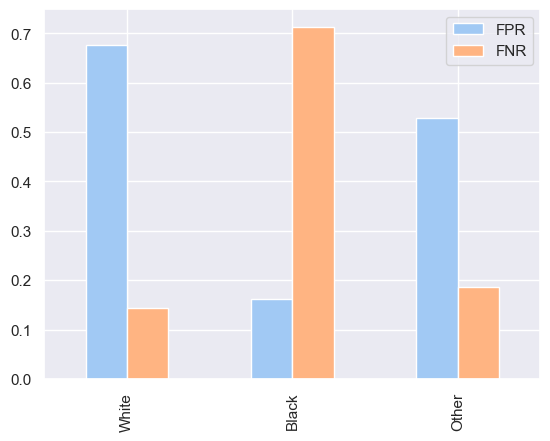

In [55]:
metrics_df_4a.T[['FPR', 'FNR']].plot(kind='bar')

In [56]:
metrics_df_4a.T.reset_index()

,index,FPR,FNR,PPV,TPR,Acc,Negative Rate,Positive Rate,Group Population,Group TN,Group TP,Group FN,Group FP
0,White,0.677,0.144,0.781,0.856,0.717,0.190,0.810,1197.0,101.0,757.0,127.0,212.0
1,Black,0.162,0.713,0.797,0.287,0.458,0.752,0.248,1727.0,449.0,342.0,849.0,87.0
2,Other,0.529,0.186,0.842,0.814,0.737,0.250,0.750,76.0,8.0,48.0,11.0,9.0


---
### 4B. Analyze re-offense rates and fairness metrics:
1. Calculate re-offense rates and key fairness metrics, including False Positive Rates (FPR) and False Negative Rates (FNR), for each racial group.
2. Deliverable: Bar charts comparing FPR and FNR across racial groups, accompanied by an interpretation of any disparities found.

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
# assume re-offense = 0
# assume no re-offense = 1
# assume re-offense / not is the ground truth (y)

# assume risk score <= risk_threshold as 1 (positive outcome)
# assume risk score > risk_threshold as 0 (negative outcome)

risk_threshold = 5
y_pred_4b = df['Risk Score'].apply(lambda x: 1 if x<=risk_threshold else 0)

y_4b = df['Re-offense'].apply(lambda x: 0 if x=="Yes" else 1)


In [59]:
results_dict_4b = {}

for col in df['Race'].unique():
    results_dict_4b[col] = {}

    tn, fp, fn, tp = confusion_matrix(y_4b[df['Race'] == col], y_pred_4b[df['Race'] == col]).ravel()

    # Sensitivity, hit rate, recall, or true positive rate
    tpr = tp/(tp+fn)
    # Specificity or true negative rate
    tnr = tn/(tn+fp)
    # Precision or positive predictive value
    ppv = tp/(tp+fp)
    # Negative predictive value
    npv = tn/(tn+fn)
    # Fall out or false positive rate
    fpr = fp/(fp+tn)
    # False negative rate
    fnr = fn/(tp+fn)
    # False discovery rate
    fdr = fp/(tp+fp)
    # Overall accuracy
    acc = (tp+tn)/(tp+fp+fn+tn)

    results_dict_4b[col]['FPR'] = round(fpr, 3)
    results_dict_4b[col]['FNR'] = round(fnr, 3)
    results_dict_4b[col]['PPV'] = round(ppv, 3) # precision
    results_dict_4b[col]['TPR'] = round(tpr, 3) # recall 
    results_dict_4b[col]['Acc'] = round(acc, 3) # accuracy
    results_dict_4b[col]['Negative Rate'] = round((tn+fn) / (tp+fp+fn+tn), 3)
    results_dict_4b[col]['Positive Rate'] = round((tp+fp) / (tp+fp+fn+tn), 3)
    results_dict_4b[col]['Group Population'] = (tp+fp+fn+tn)
    results_dict_4b[col]['Group TN'] = tn
    results_dict_4b[col]['Group TP'] = tp
    results_dict_4b[col]['Group FN'] = fn
    results_dict_4b[col]['Group FP'] = fp


# for col in df['Gender'].unique():
#     results_dict[col] = {}

#     tn, fp, fn, tp = confusion_matrix(y_pred[df['Gender'] == col], y[df['Gender'] == col]).ravel()

#     # Sensitivity, hit rate, recall, or true positive rate
#     tpr = tp/(tp+fn)
#     # Specificity or true negative rate
#     tnr = tn/(tn+fp)
#     # Precision or positive predictive value
#     ppv = tp/(tp+fp)
#     # Negative predictive value
#     npv = tn/(tn+fn)
#     # Fall out or false positive rate
#     fpr = fp/(fp+tn)
#     # False negative rate
#     fnr = fn/(tp+fn)
#     # False discovery rate
#     fdr = fp/(tp+fp)
#     # Overall accuracy
#     acc = (tp+tn)/(tp+fp+fn+tn)

#     results_dict[col]['FPR'] = round(fpr, 3)
#     results_dict[col]['FNR'] = round(fnr, 3)
#     results_dict[col]['PPV'] = round(ppv, 3)
#     results_dict[col]['TP'] = tp

In [60]:
metrics_df_4b = pd.DataFrame(results_dict_4b)
metrics_df_4b

,White,Black,Other
FPR,0.466,0.276,0.471
FNR,0.314,0.501,0.271
PPV,0.806,0.801,0.843
TPR,0.686,0.499,0.729
Acc,0.646,0.569,0.684
Negative Rate,0.372,0.570,0.329
Positive Rate,0.628,0.430,0.671
Group Population,1197.000,1727.000,76.000
Group TN,167.000,388.000,9.000
Group TP,606.000,594.000,43.000


In [61]:
# calculate disparities
# white

disparity_white = pd.DataFrame({
    'White': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  # White/White = 1.0
    'Black': round(metrics_df_4b['Black'] / metrics_df_4b['White'], 3),
    'Other': round(metrics_df_4b['Other'] / metrics_df_4b['White'], 3)
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_white

,White,Black,Other
FPR,1.0,0.592,1.011
FNR,1.0,1.596,0.863
PPV,1.0,0.994,1.046
TPR,1.0,0.727,1.063
Positive Rate,1.0,0.685,1.068
Negative Rate,1.0,1.532,0.884


In [62]:
# calculate disparities
# black

disparity_black = pd.DataFrame({
    'White': round(metrics_df_4b['White'] / metrics_df_4b['Black'], 3),
    'Black': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Other': round(metrics_df_4b['Other'] / metrics_df_4b['Black'], 3)
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_black

,White,Black,Other
FPR,1.688,1.0,1.707
FNR,0.627,1.0,0.541
PPV,1.006,1.0,1.052
TPR,1.375,1.0,1.461
Positive Rate,1.460,1.0,1.560
Negative Rate,0.653,1.0,0.577


In [63]:
# calculate disparities
# others

disparity_other = pd.DataFrame({
    'White': round(metrics_df_4b['White'] / metrics_df_4b['Other'], 3),
    'Black': round(metrics_df_4b['Black'] / metrics_df_4b['Other'], 3),
    'Other': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
}, index=['FPR', 'FNR', 'PPV', 'TPR', 'Positive Rate', 'Negative Rate'])

disparity_other

,White,Black,Other
FPR,0.989,0.586,1.0
FNR,1.159,1.849,1.0
PPV,0.956,0.950,1.0
TPR,0.941,0.684,1.0
Positive Rate,0.936,0.641,1.0
Negative Rate,1.131,1.733,1.0


<Axes: >

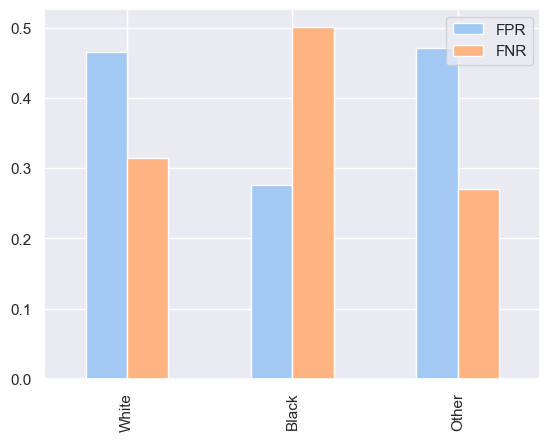

In [64]:
metrics_df_4b.T[['FPR', 'FNR']].plot(kind='bar')

In [65]:
metrics_df_4b.T.reset_index()

,index,FPR,FNR,PPV,TPR,Acc,Negative Rate,Positive Rate,Group Population,Group TN,Group TP,Group FN,Group FP
0,White,0.466,0.314,0.806,0.686,0.646,0.372,0.628,1197.0,167.0,606.0,278.0,146.0
1,Black,0.276,0.501,0.801,0.499,0.569,0.570,0.430,1727.0,388.0,594.0,597.0,148.0
2,Other,0.471,0.271,0.843,0.729,0.684,0.329,0.671,76.0,9.0,43.0,16.0,8.0
